In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
df = pd.read_csv('data/penguins.csv')
df = df.drop(['island', 'year', 'sex'], axis=1)\
    .dropna()\
    .rename(columns={'species': 'y'})
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


<AxesSubplot:xlabel='y', ylabel='count'>

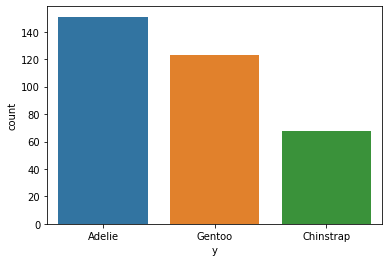

In [7]:
# explore the species
sns.countplot(x='y', data=df)

In [26]:
# lets use 75 data for easeness
df = df.sample(n=75, random_state=123)
y = df.y
df = df.drop('y', axis=1)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
182,47.3,15.3,222.0,5250.0
305,52.8,20.0,205.0,4550.0
335,45.6,19.4,194.0,3525.0
311,47.5,16.8,199.0,3900.0
171,48.7,15.1,222.0,5350.0


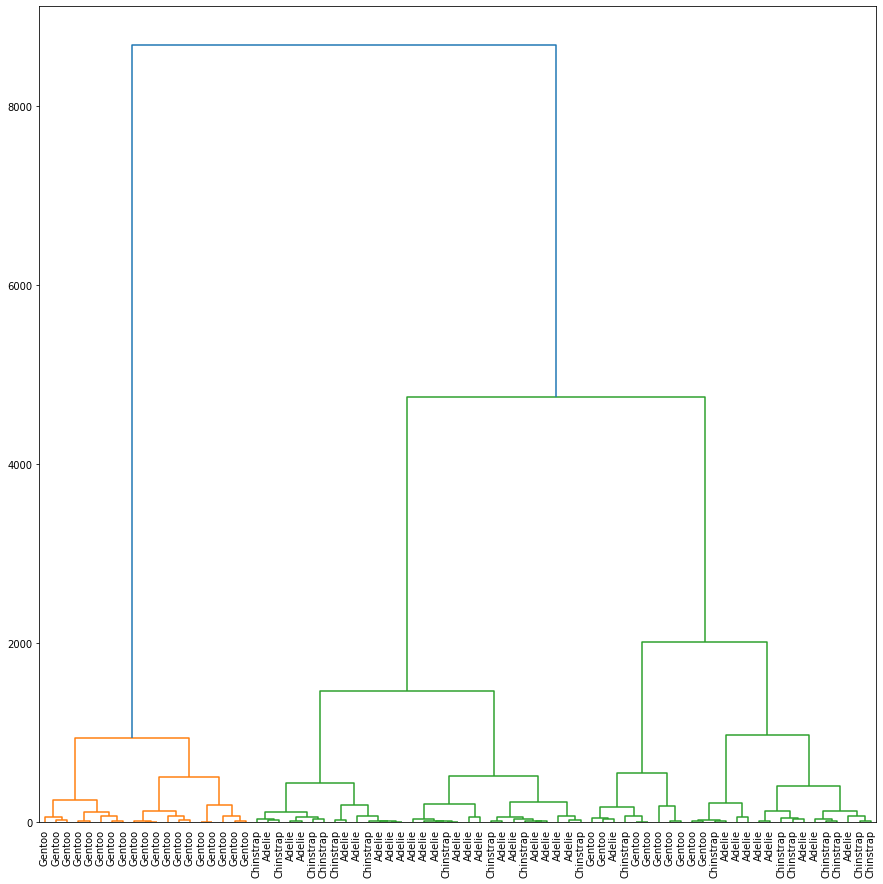

In [27]:
# Hierarchical Clustering
hc = linkage(df, method='ward', metric='euclidean')
fig = plt.figure(figsize=(15, 15))
dn = dendrogram(
    hc,
    leaf_label_func=lambda id: y.values[id],
    leaf_font_size=10
)